# **MACHINE LEARNING MINI PROJECT SUBMITTED BY :-**
# **Name : SANKET YOGESH RAI**
# **Class : TY-02-CSE**
# **Roll No : 306239**
# **Project Topic : Bitcoin Price Prediction**
# **Dataset Used : Cryptocurrency Historical Prices (Source : Kaggle)**

## **THIS PROGRAM PRIDICTS BITCOIN'S PRICE FOR FUTURE 30 DAYS BASED ON PROVIDED HISTORICAL DATA**

**IMPORTING LIBRARIES AND UPLOADING DATA**

In [ ]:
#importing required libraries

import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

In [ ]:
#uploading th data

from google.colab import files 
uploaded = files.upload()

Saving bitcoin_price.csv to bitcoin_price.csv


In [ ]:
#loading the dataset
path = r"bitcoin_price.csv"
df  = pd.read_csv(path)

**OBSERVE THE DATA**

In [ ]:
df.head()

,Date,Open,High,Low,Close,Volume,Market Cap
0,"Feb 20, 2018",11231.8,11958.5,11231.80,11403.7,"9,926,540,000","189,536,000,000"
1,"Feb 19, 2018",10552.6,11273.8,10513.20,11225.3,"7,652,090,000","178,055,000,000"
2,"Feb 18, 2018",11123.4,11349.8,10326.00,10551.8,"8,744,010,000","187,663,000,000"
3,"Feb 17, 2018",10207.5,11139.5,10149.40,11112.7,"8,660,880,000","172,191,000,000"
4,"Feb 16, 2018",10135.7,10324.1,9824.82,10233.9,"7,296,160,000","170,960,000,000"


In [ ]:
df.tail()

,Date,Open,High,Low,Close,Volume,Market Cap
1755,"May 02, 2013",116.38,125.60,92.28,105.21,-,"1,292,190,000"
1756,"May 01, 2013",139.00,139.89,107.72,116.99,-,"1,542,820,000"
1757,"Apr 30, 2013",144.00,146.93,134.05,139.00,-,"1,597,780,000"
1758,"Apr 29, 2013",134.44,147.49,134.00,144.54,-,"1,491,160,000"
1759,"Apr 28, 2013",135.30,135.98,132.10,134.21,-,"1,500,520,000"


In [ ]:
df.shape

(1760, 7)

**MODIFYING THE DATA ACCORDING TO REQUIREMENT**

In [ ]:
#Removing useless columns
df = df.drop(['Date','High','Low','Open','Volume','Market Cap'], axis=1)

In [ ]:
#Renaming the open column as price column
df = df.rename(columns = {'Close': 'Price'}, inplace = False)

In [ ]:
df.head()

,Price
0,11403.7
1,11225.3
2,10551.8
3,11112.7
4,10233.9


In [ ]:
df.tail()

,Price
1755,105.21
1756,116.99
1757,139.00
1758,144.54
1759,134.21


In [ ]:
df.shape

(1760, 1)

**CREATING PREDICTION DAYS VARIABLE AND SHIFTING DATA UPTO THAT MANY DAYS**

In [ ]:
#Declaration of a variable called prediction days
prediction_days = 30

In [ ]:
#Creating another column 'Prediction' shifted 30 days up
df['Prediction'] = df[['Price']].shift(-prediction_days)

In [ ]:
df.head()

,Price,Prediction
0,11403.7,11600.1
1,11225.3,12899.2
2,10551.8,11607.4
3,11112.7,11474.9
4,10233.9,11188.6


In [ ]:
df.tail()

,Price,Prediction
1755,105.21,NaN
1756,116.99,NaN
1757,139.00,NaN
1758,144.54,NaN
1759,134.21,NaN


In [ ]:
df.shape

(1760, 2)

**CREATE INDEPENDENT DATA SET**

In [ ]:
#convert dataframe to numpy array and drop the prediction column
X = np.array(df.drop(['Prediction'], 1))

#remove the last 'n' rows where 'n' is the prediction_days
X = X[:len(df)-prediction_days]

print(X)

[[11403.7]
 [11225.3]
 [10551.8]
 ...
 [  128.8]
 [  132.3]
 [  129. ]]


**CREATE THE DEPENDENT DATASET**

In [ ]:
#convert dataframe to numpy array
y = np.array(df['Prediction'])

#get all the values except the last 'n' rows
y = y[:-prediction_days]

print(y)

[11600.1  12899.2  11607.4  ...   139.     144.54   134.21]


**SPLIT THE DATASET INTO 80% TRAINING AND 20% TESTING**

In [ ]:
from sklearn.model_selection import train_test_split
x_train, x_test, y_train, y_test = train_test_split(X,y, test_size = 0.2)

In [ ]:
#set the prediction_days_array equal to the last 30 rows from the original data set
prediction_days_array = np.array(df.drop(['Prediction'], 1))[-prediction_days:]

print(prediction_days_array)

[[129.75]
 [133.48]
 [131.98]
 [133.2 ]
 [126.7 ]
 [123.89]
 [122.88]
 [122.  ]
 [121.99]
 [123.5 ]
 [123.02]
 [118.76]
 [114.22]
 [111.5 ]
 [117.98]
 [115.  ]
 [115.24]
 [117.2 ]
 [112.67]
 [113.57]
 [111.5 ]
 [112.3 ]
 [115.91]
 [112.5 ]
 [ 97.75]
 [105.21]
 [116.99]
 [139.  ]
 [144.54]
 [134.21]]


**FIRST ALGORITHM**

**CREATE AND TRAIN THE SUPPORT VECTOR MACHINE (REGRESSION) USING VECTOR RADIAL BASIS FUNCTION**

In [ ]:
from sklearn.svm import SVR

svr_rbf = SVR(kernel='rbf', C=1e3, gamma=0.00001)
svr_rbf.fit(x_train, y_train)

SVR(C=1000.0, cache_size=200, coef0=0.0, degree=3, epsilon=0.1, gamma=1e-05,
    kernel='rbf', max_iter=-1, shrinking=True, tol=0.001, verbose=False)

**TEST THE MODEL**

In [ ]:
svr_rbf_confidence = svr_rbf.score(x_test, y_test)

print("svr_rbf accuracy: ", svr_rbf_confidence)

svr_rbf accuracy:  0.737848976267161


**PRINT THE PREDICTED VALUES**

In [ ]:
svm_prediction = svr_rbf.predict(x_test)

print(svm_prediction)

print()
#print the actual values
print(y_test)

[  106.25629281  3209.31839762   331.43834133  7630.69520319
   266.5720353    434.91562587   221.02641909   463.90043317
   420.65331709   586.07541522   582.75342204   604.88937866
  3209.47468472   611.75547384  3235.6382364    596.21027993
   574.63630783   228.50313225  3459.29279521  2392.72214395
   620.89072241   738.0775798    339.31854471  2308.07130122
  6294.03008421   116.29362086   272.75353533   358.74073673
   632.22286001  5699.21935398  1262.3528667    648.77416948
   234.61056805  7408.0106491   4278.40331207   277.65499063
   503.0771267    734.6257483    106.16862748   106.18503096
   276.77354808   232.46407436   324.57791188 11156.0511509
   227.82777549   231.15938505   572.88366434  1007.06691108
   229.44228578   732.72057696   113.67454755  6277.65715474
  2339.58208677   287.42396906   106.74484805   106.5276861
   264.35530421  5754.30247276   568.68770369   456.93063851
   106.57147237  3189.99197821   227.23609815  7492.04274181
   377.15544648   364.0899

**PRINT THE MODEL PREDICTIONS FOR NEXT "N=30" DAYS**

In [ ]:
svm_prediction = svr_rbf.predict(prediction_days_array)

#predictions for the next 30 days
print(svm_prediction)

print()

#print the actual price of bitcoin for last 30 days
print(df.tail(prediction_days))

[114.12514151 116.53069872 115.53097518 116.34085239 112.36474679
 110.9171573  110.43934143 110.04183679 110.03742142 110.7299424
 110.50420368 108.73361491 107.33104732 106.74484805 108.45613708
 107.53494425 107.60083202 108.19357227 106.97294607 107.17319548
 106.74484805 106.89684934 107.79254788 106.9375297  107.00726565
 106.16865156 108.12545345 120.56276146 125.12237291 117.03253029]

       Price  Prediction
1730  129.75         NaN
1731  133.48         NaN
1732  131.98         NaN
1733  133.20         NaN
1734  126.70         NaN
1735  123.89         NaN
1736  122.88         NaN
1737  122.00         NaN
1738  121.99         NaN
1739  123.50         NaN
1740  123.02         NaN
1741  118.76         NaN
1742  114.22         NaN
1743  111.50         NaN
1744  117.98         NaN
1745  115.00         NaN
1746  115.24         NaN
1747  117.20         NaN
1748  112.67         NaN
1749  113.57         NaN
1750  111.50         NaN
1751  112.30         NaN
1752  115.91         NaN
175

**SECOND ALGORITHM**

**APPLYING SIMPLE LINEAR REGRESSION**

In [ ]:
from sklearn import linear_model
reg = linear_model.LinearRegression()
reg.fit(x_train, y_train)

LinearRegression(copy_X=True, fit_intercept=True, n_jobs=None, normalize=False)

**TEST THE MODEL**

In [ ]:
reg_confidence = reg.score(x_test, y_test)
print(reg_confidence)

0.756966320775146


In [ ]:
reg.coef_

array([0.83563094])

**PRINT THE PREDICTED VALUES**

In [ ]:
reg_predict = reg.predict(x_test)
print(reg_predict)

[  169.26085581  3745.87825535   359.23319308 12083.23551766
   305.86144512   442.48710335   273.07128714   464.18008248
   431.72417688   578.18521124   573.64773525   606.93091548
  3745.69441654   618.52947289  3720.40822438   593.03437299
   563.19399223   278.21877372  3587.79359465  2156.47478756
   634.30618498   776.91496072   365.97673474  2257.41900478
 11285.7093512    194.65568      310.62454146   382.43030789
   653.40870821 14236.32219045  1753.71738845   678.71161299
   282.48049149 13288.80027076  6196.49967963   314.46008746
   494.37142824   773.63928745   171.26637006   172.16885148
   313.76651378   280.97635581   353.35870759  9672.18957457
   277.75082039   280.06551809   561.04642072  1081.07626556
   278.87056585   771.82596832   191.20452422  8900.81865644
  2216.31431898   322.25652411   176.58098282   175.45288106
   304.17347062  8346.6365752    556.04934771   458.95738912
   166.97122705  3782.65437289   277.34136123 12595.56084526
   397.63043464   386.89

**PRINT THE MODEL PREDICTIONS FOR NEXT "N=30" DAYS**

In [ ]:
reg_prediction = reg.predict(prediction_days_array)

#predictions for the next 30 days
print(reg_prediction)

print()

#print the actual price of bitcoin for last 30 days
print(df.tail(prediction_days))

[191.83124743 194.94815082 193.69470442 194.71417416 189.28257307
 186.93445014 186.09046289 185.35510766 185.34675136 186.60855407
 186.20745122 182.64766343 178.85389897 176.58098282 181.9958713
 179.5056911  179.70624253 181.34407917 177.55867102 178.31073886
 176.58098282 177.24948757 180.26611526 177.41661376 165.09105744
 171.32486423 181.16859667 199.5608336  204.19022899 195.55816141]

       Price  Prediction
1730  129.75         NaN
1731  133.48         NaN
1732  131.98         NaN
1733  133.20         NaN
1734  126.70         NaN
1735  123.89         NaN
1736  122.88         NaN
1737  122.00         NaN
1738  121.99         NaN
1739  123.50         NaN
1740  123.02         NaN
1741  118.76         NaN
1742  114.22         NaN
1743  111.50         NaN
1744  117.98         NaN
1745  115.00         NaN
1746  115.24         NaN
1747  117.20         NaN
1748  112.67         NaN
1749  113.57         NaN
1750  111.50         NaN
1751  112.30         NaN
1752  115.91         NaN
175

**THIRD ALGORITHM**

**APPLYING DECISION TREE REGRESSION**

In [ ]:
from sklearn.tree import DecisionTreeRegressor
dtreg = DecisionTreeRegressor()
dtreg.fit(x_train, y_train)

DecisionTreeRegressor(ccp_alpha=0.0, criterion='mse', max_depth=None,
                      max_features=None, max_leaf_nodes=None,
                      min_impurity_decrease=0.0, min_impurity_split=None,
                      min_samples_leaf=1, min_samples_split=2,
                      min_weight_fraction_leaf=0.0, presort='deprecated',
                      random_state=None, splitter='best')

**TEST THE MODEL**

In [ ]:
dtreg_confidence = dtreg.score(x_test, y_test)
print(dtreg_confidence)

0.8083073184057454


**PRINT THE PREDICTED VALUES**

In [ ]:
dtreg_predict = dtreg.predict(x_test)
print(dtreg_predict)

[   86.76   2228.41    357.84  10975.6     227.09    363.18    274.47
   424.28    435.12    448.9     655.56    840.     2228.41    576.6
  4703.39    626.27    655.05    226.68   4382.66   2038.87    569.19
   262.5     130.69   2686.81  11074.6     135.35    226.85    313.86
   799.11   8200.64   1210.29    641.63    264.47   9818.35   4328.41
   244.3     495.77    818.72     93.59     88.05    244.3     245.59
   376.9   19140.8     236.93    275.83    623.03   1061.35    199.26
   781.48    125.6   13925.8    1987.71    234.82     98.4      97.45
   287.46   5753.09    556.14    418.09    118.76   4578.77    222.6
 11323.2     382.56    361.56    136.77    577.47   1129.43    270.64
   799.11   1038.15   6635.75    129.22    477.43   2273.43   2689.1
   264.08    105.      186.69   7708.99     94.12    417.27   1054.23
  1143.81   3637.52   2357.9     257.98    988.67   2480.84    630.23
   549.26    244.3     113.5     229.98    236.43    229.98    631.11
  5590.69   2518.66    

**PRINT THE MODEL PREDICTIONS FOR NEXT "N=30" DAYS**

In [ ]:
dtreg_prediction = dtreg.predict(prediction_days_array)

#predictions for the next 30 days
print(dtreg_prediction)

print()

#print the actual price of bitcoin for last 30 days
print(df.tail(prediction_days))

[105.21  106.09  138.34  135.35  106.22  136.77  101.2   112.5   112.5
 136.77   91.61   94.51  135.85   98.4    94.51  135.85  135.85   94.51
  98.4    91.375  98.4    98.4   135.85   98.4    99.51   93.59   94.51
 104.5   130.37  122.62 ]

       Price  Prediction
1730  129.75         NaN
1731  133.48         NaN
1732  131.98         NaN
1733  133.20         NaN
1734  126.70         NaN
1735  123.89         NaN
1736  122.88         NaN
1737  122.00         NaN
1738  121.99         NaN
1739  123.50         NaN
1740  123.02         NaN
1741  118.76         NaN
1742  114.22         NaN
1743  111.50         NaN
1744  117.98         NaN
1745  115.00         NaN
1746  115.24         NaN
1747  117.20         NaN
1748  112.67         NaN
1749  113.57         NaN
1750  111.50         NaN
1751  112.30         NaN
1752  115.91         NaN
1753  112.50         NaN
1754   97.75         NaN
1755  105.21         NaN
1756  116.99         NaN
1757  139.00         NaN
1758  144.54         NaN
1759  13

**FOURTH ALGORITHM**

**APPLYING KNN REGRESSION MODEL**

In [ ]:
from sklearn.neighbors import KNeighborsRegressor
knnreg = KNeighborsRegressor()
knnreg.fit(x_train, y_train)

KNeighborsRegressor(algorithm='auto', leaf_size=30, metric='minkowski',
                    metric_params=None, n_jobs=None, n_neighbors=5, p=2,
                    weights='uniform')

**TEST THE MODEL**

In [ ]:
knnreg_confidence = knnreg.score(x_test, y_test)
print(knnreg_confidence)

0.870027146254525


**PRINT THE PREDICTED VALUES**

In [ ]:
knnreg_predict = knnreg.predict(x_test)
print(knnreg_predict)

[  101.882  3492.186   351.272 10883.436   266.878   401.43    266.65
   364.49    412.292   563.998   613.492   682.01   3492.186   608.728
  3345.064   569.864   579.972   264.128  3767.616  1898.078   594.078
   733.074   274.204  2407.846 12972.41    129.388   246.85    351.442
   731.11   8783.07   1499.542   628.34    243.41   8953.734  4462.216
   297.342   479.87    692.362   100.084    91.85    287.296   245.556
   350.772 14641.16    268.662   255.44    608.91   1101.278   243.534
   796.844   127.088 11987.84   2347.952   259.776   100.498   105.906
   282.84   8704.608   624.758   435.182   109.128  3488.516   261.4
 10314.472   405.152   398.318   106.466   587.014   829.87    351.272
   735.236   977.868  9459.166   126.512   379.704  3828.326  2026.972
   255.44    108.376   521.382  9621.02    100.62    435.098  1051.542
  1131.262  3767.122  3836.516   232.544  1037.798  2286.788   608.728
   519.99    288.554   125.54    292.146   261.016   292.146   613.694
  7429.95

**PRINT THE MODEL PREDICTIONS FOR NEXT "N=30" DAYS**

In [ ]:
knnreg_prediction = knnreg.predict(prediction_days_array)

#predictions for the next 30 days
print(knnreg_prediction)

print()

#print the actual price of bitcoin for last 30 days
print(df.tail(prediction_days))

[113.886 129.388 129.046 129.388 112.036 107.966 107.966 108.252 108.252
 107.966 107.966  96.34  102.89  100.498  96.34  102.302 102.302 104.362
 102.89  102.89  100.498 102.89  103.972 102.89  107.29  100.084 104.362
 121.238 126.512 119.358]

       Price  Prediction
1730  129.75         NaN
1731  133.48         NaN
1732  131.98         NaN
1733  133.20         NaN
1734  126.70         NaN
1735  123.89         NaN
1736  122.88         NaN
1737  122.00         NaN
1738  121.99         NaN
1739  123.50         NaN
1740  123.02         NaN
1741  118.76         NaN
1742  114.22         NaN
1743  111.50         NaN
1744  117.98         NaN
1745  115.00         NaN
1746  115.24         NaN
1747  117.20         NaN
1748  112.67         NaN
1749  113.57         NaN
1750  111.50         NaN
1751  112.30         NaN
1752  115.91         NaN
1753  112.50         NaN
1754   97.75         NaN
1755  105.21         NaN
1756  116.99         NaN
1757  139.00         NaN
1758  144.54         NaN
1759

**ACCURACY SCORES OF ALL THE MODELS ARE**

In [ ]:
#accuracy score of SVR
print("Accuracy score of SVR : ",svr_rbf_confidence)
#accuracy score of simple linear regression
print("Accuracy score of simple linear regression : ",reg_confidence)
#accuracy score of decision tree regression
print("Accuracy score of decision tree regression : ",dtreg_confidence)
#accuracy score of knn regression
print("Accuracy score of KNN regression : ",knnreg_confidence)

Accuracy score of SVR :  0.737848976267161
Accuracy score of simple linear regression :  0.756966320775146
Accuracy score of decision tree regression :  0.8083073184057454
Accuracy score of KNN regression :  0.870027146254525


**VISUALIZATION OF ALGORITHMS COMPARISON BASED ON ACCURACY**

/usr/local/lib/python3.6/dist-packages/seaborn/_decorators.py:43: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  FutureWarning


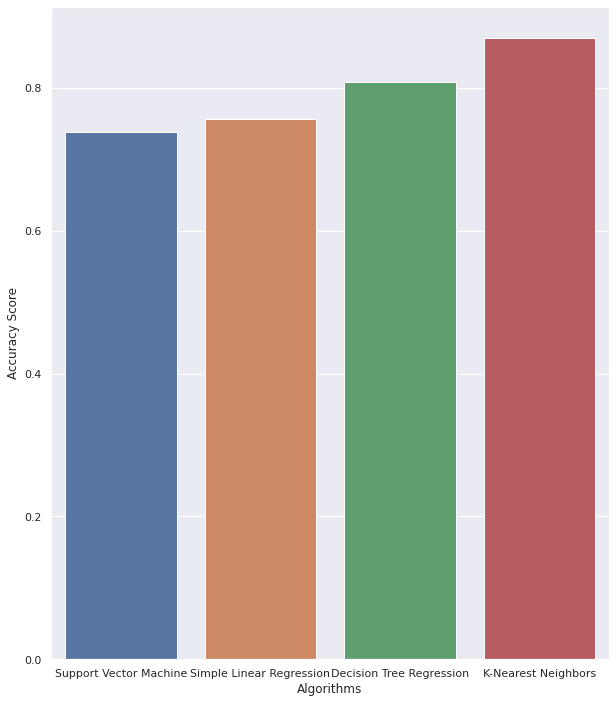

In [ ]:
scores = [svr_rbf_confidence, reg_confidence, dtreg_confidence, knnreg_confidence]
algorithms = ["Support Vector Machine", "Simple Linear Regression", "Decision Tree Regression", "K-Nearest Neighbors"]
sns.set(rc={'figure.figsize':(10,12)})
plt.xlabel("Algorithms")
plt.ylabel("Accuracy Score")
sns.barplot(algorithms, scores)